<center>
    <h1 id='mutual-information' style='color:#7159c1'>⚙️ Mutual Information ⚙️</h1>
    <i>Dealing with Inconsistent Categorical Variables Values</i>
</center>

---

`Mutual Information` is like `Permutation Importance`, but used BEFORE training the model. It's like you start working with a dataset and you wanna know which features are the most important in order to make your model more accurate.

Also, Mutual Information (MI) is a lot like correlation in that it measures a relationship between two quantities. The advantage of mutual information is that it can detect `ANY KIND OF RELATIONSHIP, while correlation ONLY DETECTS LINEAR RELATIONSHIPS`.

The minimum value for MI is `0.0`, meaning that the Features are independent (doesn't have any relationships). Also, values `above 2.0 or so are uncommon` (as far as Mutual information is a logarithmic quantity, it increases very slowly).

In the end, don't forget to apply Categorical Features Encoding before calculating MI.

In [4]:
# ---- Settings ----
import matplotlib.pyplot as plt # pip install matplotlib
import mplcyberpunk # pip install mplcyberpunk
import numpy as np # pip install numpy
import pandas as pd # pip install pandas
from sklearn.model_selection import train_test_split # pip install sklearn
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns # pip install seaborn

plt.style.use('cyberpunk')

# ---- Reading Dataset ----
autos_df = pd.read_csv('./datasets/autos.csv')
autos_df = autos_df.select_dtypes(exclude=['object'])
X = autos_df.copy()
y = X.pop('price')

In [5]:
# ----- Identifying Discrete and Continuous Features ----
#
# - remember that the categorical variables must be encoded
# and that them are considered as discrete (after being encoded)
# they are turned into 'integers'
#
discrete_features = [
    column for column in X.columns
    if X[column].dtype in ['int64', 'int32']
]

continuous_features = [
    column for column in X.columns
    if X[column].dtype in ['float32', 'float64']
]

In [10]:
# ---- Calculating Mutual Information Scores ----
mi_scores_discrete = mutual_info_regression(X[discrete_features], y)
mi_scores_continuous = mutual_info_regression(X[continuous_features], y)

mi_scores = pd.concat([
    pd.Series(mi_scores_discrete, name='MI Scores', index=discrete_features)
    , pd.Series(mi_scores_continuous, name='MI Scores', index=continuous_features)
])

mi_scores = mi_scores.sort_values(ascending=True)

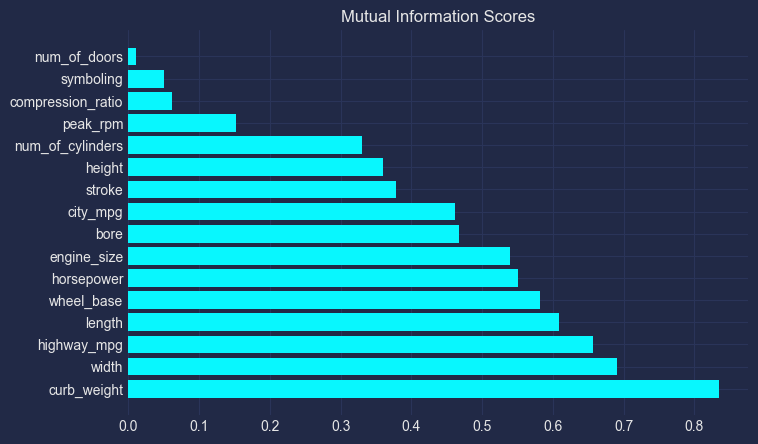

In [11]:
# ---- Plotting Results ----
def plot_mi_scores(mi_scores):
    """
    \ Description:
        - plot mutual information scores.
    
    \ Parameters:
        - mi_scores: pandas series.
    """
    width = np.arange(len(mi_scores))
    ticks = list(mi_scores.index)
    plt.barh(width, mi_scores)
    plt.yticks(width, ticks)
    plt.title('Mutual Information Scores')
    
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

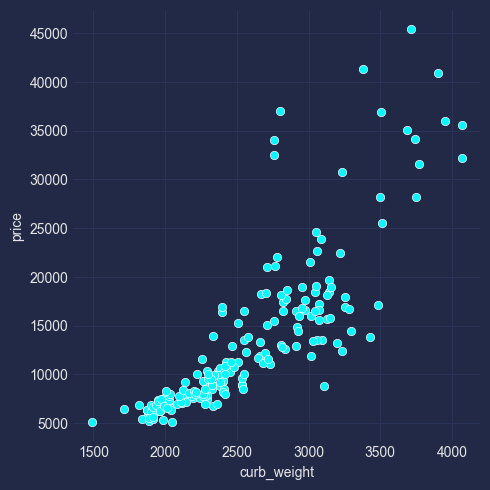

In [13]:
# ---- Plotting Results ----
sns.relplot(x='curb_weight', y='price', data=autos_df)
plt.show()

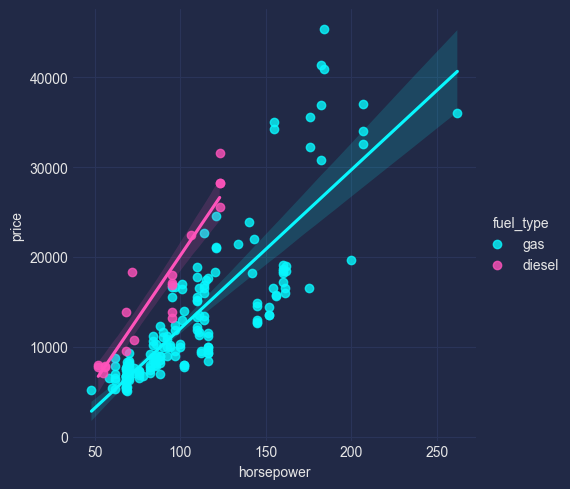

In [16]:
# ---- Plotting Results ----
#
# The fuel_type feature has a fairly low MI score, but as we can see from the figure, it clearly separates
# two price populations with different trends within the horsepower feature. This indicates that fuel_type
# contributes an interaction effect and might not be unimportant after all. Before deciding a feature is
# unimportant from its MI score, it's good to investigate any possible interaction effects -- domain
# knowledge can offer a lot of guidance here.
#
autos_df = pd.read_csv('./datasets/autos.csv')
sns.lmplot(x="horsepower", y="price", hue="fuel_type", data=autos_df);

---

<h1 id='reach-me' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>📫 | Reach Me</h1>

> **Email** - [csfelix08@gmail.com](mailto:csfelix08@gmail.com?)

> **Linkedin** - [linkedin.com/in/csfelix/](https://www.linkedin.com/in/csfelix/)

> **GitHub:** - [CSFelix](https://github.com/CSFelix)

> **Kaggle** - [DSFelix](https://www.kaggle.com/dsfelix)

> **Portfolio** - [CSFelix.io](https://csfelix.github.io/).